<a href="https://colab.research.google.com/github/Paulovinicius212/ANALISE_REAL_FINAN-AS/blob/main/ANALISE_REAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISES REAIS**

# ***Importar o CSV para o Google Colab***

In [122]:
from google.colab import files
uploaded = files.upload()


Saving VINIX_FINANÇAS.xlsx to VINIX_FINANÇAS.xlsx


# ***Carregar e Preparar os Dados***

# ***Carregar Todos os DataFrames***

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo Excel
file_path = '/content/VINIX_FINANÇAS.xlsx'

# Carregar as abas do Excel
df_servicos = pd.read_excel(file_path, sheet_name='Serviços')
df_estoque = pd.read_excel(file_path, sheet_name='Estoque')
df_pendencias = pd.read_excel(file_path, sheet_name='Pendências')
df_fornecedores = pd.read_excel(file_path, sheet_name='Fornecedores')
df_despesas = pd.read_excel(file_path, sheet_name='Despesas')

# Verificar as primeiras linhas de cada DataFrame para garantir que foram carregados corretamente
print("Serviços:")
print(df_servicos.head())
print("\nEstoque:")
print(df_estoque.head())
print("\nPendências:")
print(df_pendencias.head())
print("\nFornecedores:")
print(df_fornecedores.head())
print("\nDespesas:")
print(df_despesas.head())


Serviços:
      ID   Marca_Veículos Placa_Veículos            Cliente  \
0  SER_1       FIAT/PALIO              *         CLIENTE 47   
1  SER_2      FIAT/STRADA              *   CLIENTE CAPANEMA   
2  SER_3  RENAULT/FLUENCE              *   CLIENTE CAPANEMA   
3  SER_4           VW/GOL              *     CLIENTE ESTIVA   
4  SER_5  FORD/FIESTA NEW              *  CLIENTE PEIXE-BOI   

                                  Descrição_Serviços Funcionário_Serviço  \
0         SERVIÇO DE TROCA DA CAIXA SUP. DO RADIADOR               PAULO   
1  SERVIÇO DE TROCA DAS DUAS CAIXAS DO RADIADOR M...               PAULO   
2                     SERVIÇO DE TROCA DO VENTILADOR               PAULO   
3         SERVIÇO DE TROCA DA CAIXA DO RADIADOR INF.               PAULO   
4                     SERVIÇO DE TROCA DO VENTILADOR               PAULO   

   Data_Serviço Horário_Serviço  Preço_Serviço Feedback  Meu_Lucro  
0         45538        10:00:00            200        *        100  
1         45538 

# ***2.1. Interface com ipywidgets***

In [117]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Carregar os dados
file_path = '/content/VINIX_FINANÇAS.xlsx'
df_servicos = pd.read_excel(file_path, sheet_name='Serviços')
df_estoque = pd.read_excel(file_path, sheet_name='Estoque')
df_pendencias = pd.read_excel(file_path, sheet_name='Pendências')
df_fornecedores = pd.read_excel(file_path, sheet_name='Fornecedores')
df_despesas = pd.read_excel(file_path, sheet_name='Despesas')

def mostrar_dados(sheet_name):
    if sheet_name == 'Serviços':
        display(df_servicos.head())
    elif sheet_name == 'Estoque':
        display(df_estoque.head())
    elif sheet_name == 'Pendências':
        display(df_pendencias.head())
    elif sheet_name == 'Fornecedores':
        display(df_fornecedores.head())
    elif sheet_name == 'Despesas':
        display(df_despesas.head())

# Criação dos widgets
dropdown = widgets.Dropdown(
    options=['Serviços', 'Estoque', 'Pendências', 'Fornecedores', 'Despesas'],
    value='Serviços',
    description='Escolha a Aba:',
)

# Conectar o widget a uma função
widgets.interactive(mostrar_dados, sheet_name=dropdown)


interactive(children=(Dropdown(description='Escolha a Aba:', options=('Serviços', 'Estoque', 'Pendências', 'Fo…

# **1. SERVIÇOS**

# ***Distribuição de Preços dos Serviços***

In [128]:
# Estatísticas descritivas dos preços dos serviços
preco_servico_descricao = df_servicos['Preço_Serviço'].describe()

print("\nDistribuição dos Preços dos Serviços:")
print(preco_servico_descricao)



Distribuição dos Preços dos Serviços:
count     14.000000
mean     144.285714
std       93.538498
min       50.000000
25%       85.000000
50%      140.000000
75%      150.000000
max      400.000000
Name: Preço_Serviço, dtype: float64


# ***Análise do Tempo de Serviço***

In [ ]:
# Garantir que 'Data_Serviço' e 'Horário_Serviço' estão no formato correto
df_servicos['Data_Serviço'] = pd.to_datetime(df_servicos['Data_Serviço'])
df_servicos['Horário_Serviço'] = pd.to_datetime(df_servicos['Horário_Serviço'], format='%H:%M:%S').dt.time

# Analisar serviços por data
servicos_por_data = df_servicos.groupby(df_servicos['Data_Serviço'].dt.date)['ID'].count()

print("\nNúmero de Serviços por Data:")
print(servicos_por_data)

# Analisar serviços por horário
servicos_por_horario = df_servicos.groupby(df_servicos['Horário_Serviço'])['ID'].count()

print("\nNúmero de Serviços por Horário:")
print(servicos_por_horario)


# ***Análise do Total de Serviços Prestados***

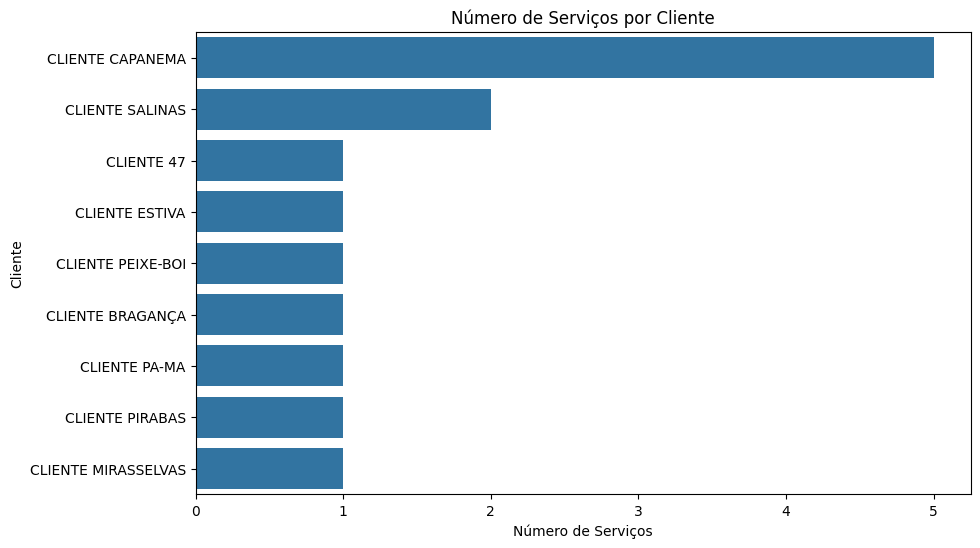

In [124]:
# Serviços por cliente
plt.figure(figsize=(10, 6))
sns.countplot(y='Cliente', data=df_servicos, order=df_servicos['Cliente'].value_counts().index)
plt.title('Número de Serviços por Cliente')
plt.xlabel('Número de Serviços')
plt.ylabel('Cliente')
plt.show()


# ***Lucro por Serviço***

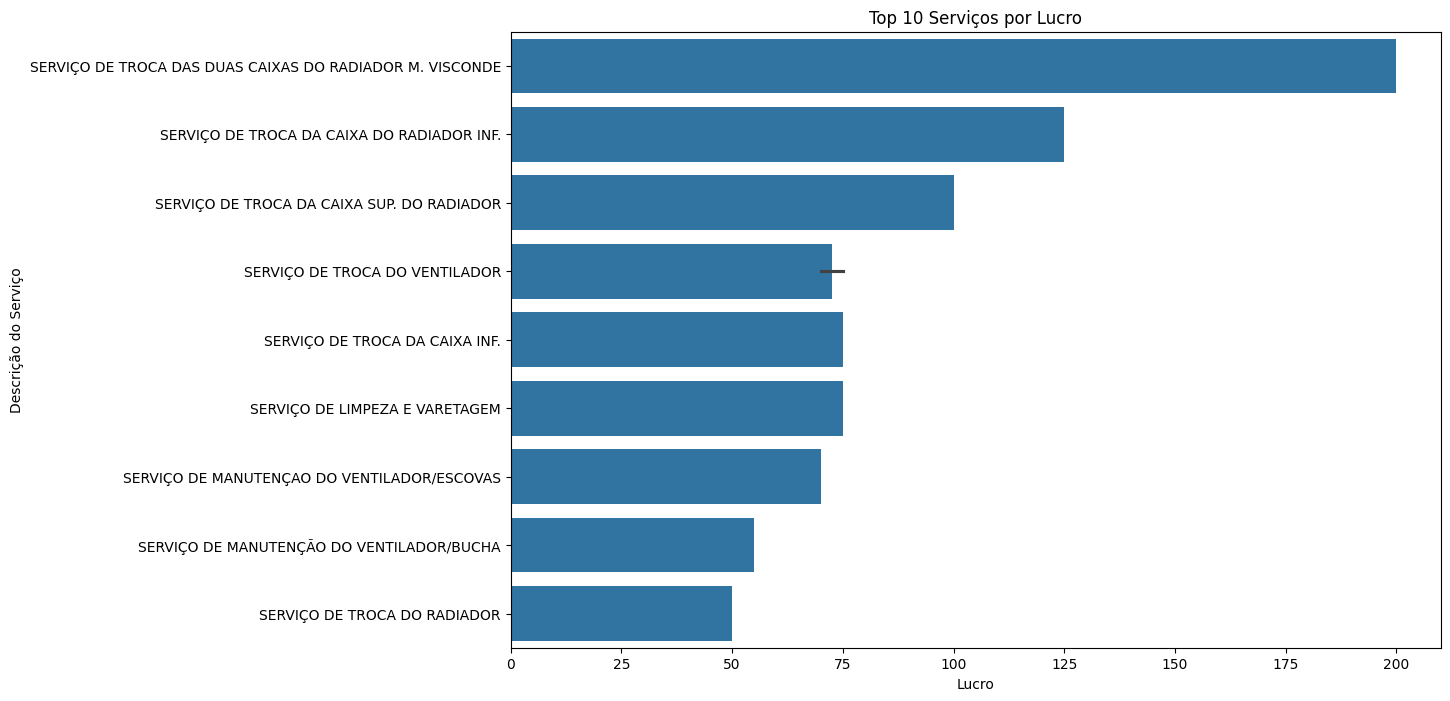

In [66]:
# Garantir que 'Meu_Lucro' é numérico
df_servicos['Meu_Lucro'] = pd.to_numeric(df_servicos['Meu_Lucro'], errors='coerce')

# Analisar lucro por serviço
lucro_por_servico = df_servicos[['Descrição_Serviços', 'Meu_Lucro']].sort_values(by='Meu_Lucro', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Meu_Lucro', y='Descrição_Serviços', data=lucro_por_servico.head(10))
plt.title('Top 10 Serviços por Lucro')
plt.xlabel('Lucro')
plt.ylabel('Descrição do Serviço')
plt.show()


# ***Análise de Preço e Feedback***

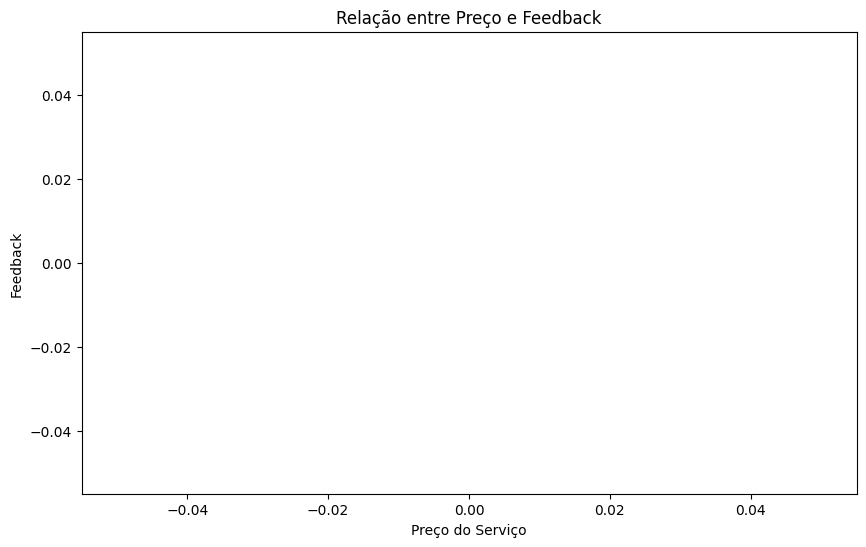

In [67]:
# Garantir que 'Preço_Serviço' e 'Feedback' são numéricos
df_servicos['Preço_Serviço'] = pd.to_numeric(df_servicos['Preço_Serviço'], errors='coerce')
df_servicos['Feedback'] = pd.to_numeric(df_servicos['Feedback'], errors='coerce')

# Analisar a correlação entre preço e feedback
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Preço_Serviço', y='Feedback', data=df_servicos)
plt.title('Relação entre Preço e Feedback')
plt.xlabel('Preço do Serviço')
plt.ylabel('Feedback')
plt.show()


# **2. ESTOQUE**

# ***Resumo das Quantidades de Peças***

In [72]:
# Estatísticas descritivas das quantidades de peças
quantidade_pecas_descricao = df_estoque['Quantidade_Peças'].describe()

print("\nDistribuição das Quantidades de Peças:")
print(quantidade_pecas_descricao)



Distribuição das Quantidades de Peças:
count    22.000000
mean      2.318182
std       2.212225
min       0.000000
25%       0.000000
50%       2.000000
75%       4.750000
max       6.000000
Name: Quantidade_Peças, dtype: float64


# ***Análise do Custo Médio das Peças***

In [73]:
# Estatísticas descritivas dos preços unitários
preco_unitario_in_descricao = df_estoque['Preço_Unitário_in'].describe()
preco_unitario_fin_descricao = df_estoque['Preço_Unitário_fin'].describe()

print("\nDistribuição dos Preços Unitários de Entrada:")
print(preco_unitario_in_descricao)
print("\nDistribuição dos Preços Unitários de Saída:")
print(preco_unitario_fin_descricao)



Distribuição dos Preços Unitários de Entrada:
count    22.000000
mean     40.909091
std       9.081164
min      30.000000
25%      32.500000
50%      40.000000
75%      47.500000
max      60.000000
Name: Preço_Unitário_in, dtype: float64

Distribuição dos Preços Unitários de Saída:
count     22.000000
mean     110.454545
std       16.176783
min       90.000000
25%      100.000000
50%      100.000000
75%      120.000000
max      150.000000
Name: Preço_Unitário_fin, dtype: float64


# ***Inventário Atual***

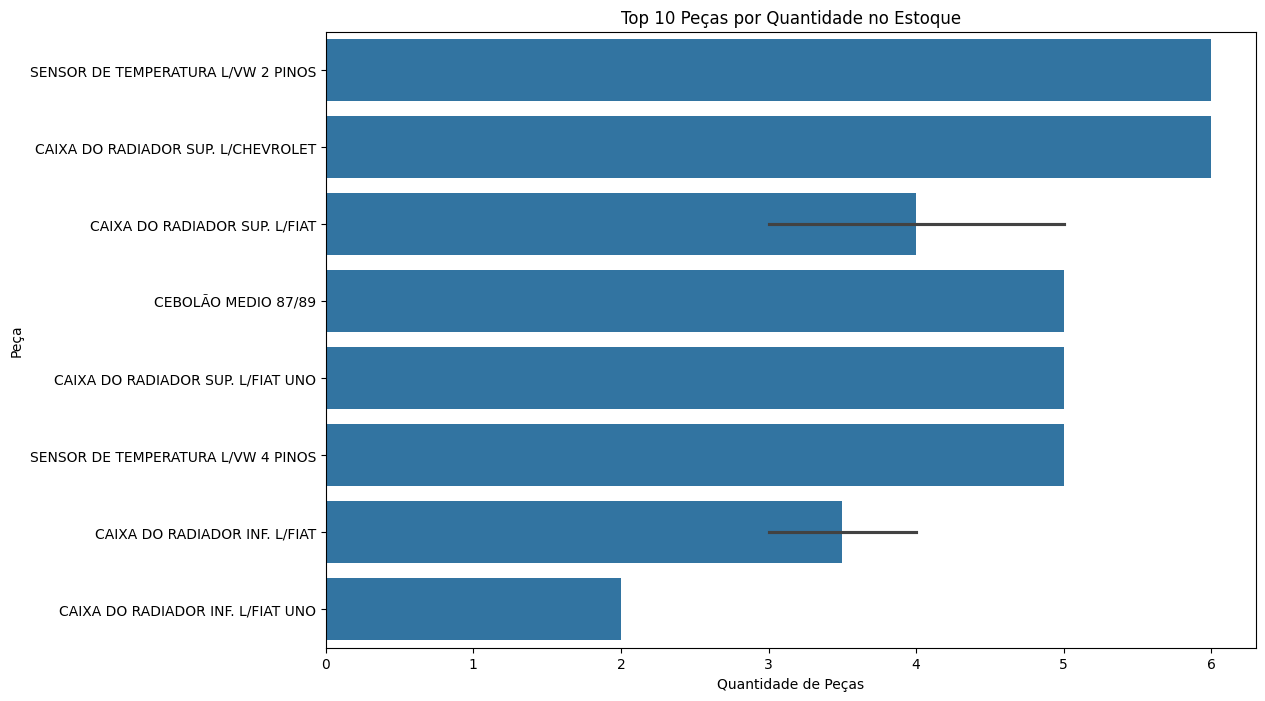

In [68]:
# Inventário atual
plt.figure(figsize=(12, 8))
sns.barplot(x='Quantidade_Peças', y='Peças', data=df_estoque.sort_values(by='Quantidade_Peças', ascending=False).head(10))
plt.title('Top 10 Peças por Quantidade no Estoque')
plt.xlabel('Quantidade de Peças')
plt.ylabel('Peça')
plt.show()


# ***Lucro e Ganho Líquido***

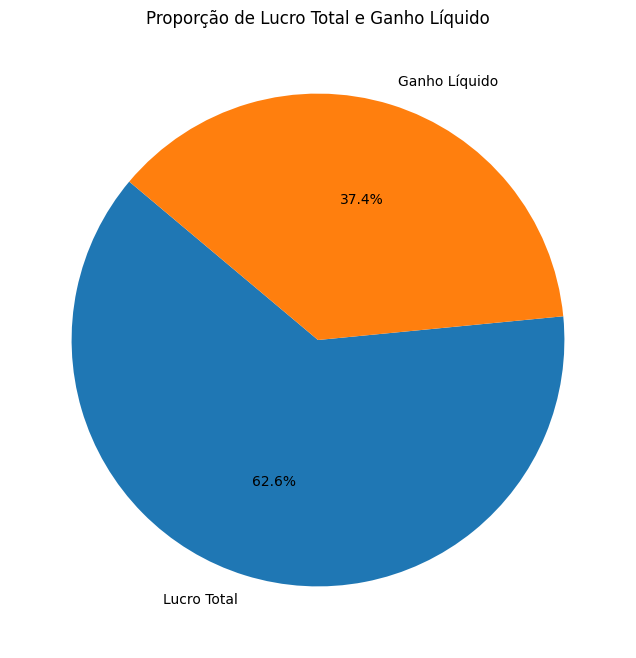

In [43]:
# Garantir que 'Lucro_Total' e 'Ganho_liquido' são numéricos
df_estoque['Lucro_Total'] = pd.to_numeric(df_estoque['Lucro_Total'], errors='coerce')
df_estoque['Ganho_liquido'] = pd.to_numeric(df_estoque['Ganho_liquido'], errors='coerce')

# Analisar lucro e ganho líquido
total_lucro = df_estoque['Lucro_Total'].sum()
total_ganho_liquido = df_estoque['Ganho_liquido'].sum()

plt.figure(figsize=(8, 8))
labels = ['Lucro Total', 'Ganho Líquido']
sizes = [total_lucro, total_ganho_liquido]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporção de Lucro Total e Ganho Líquido')
plt.show()


# ***Investimento Total***

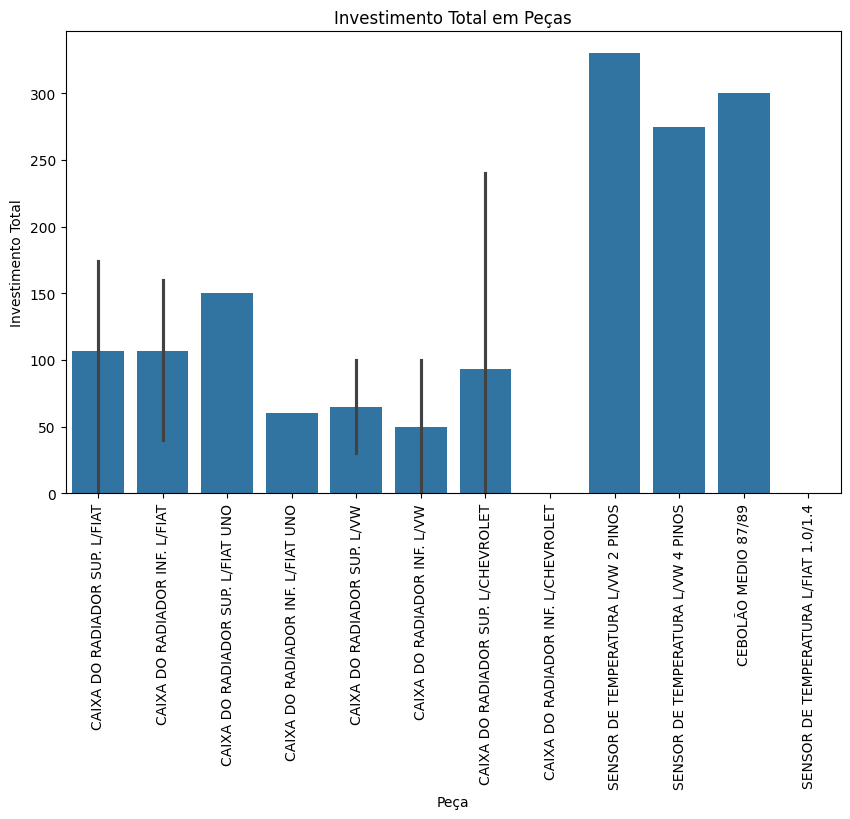

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analisar investimento total
plt.figure(figsize=(10, 6))
sns.barplot(x='Peças', y='Investimento_total', data=df_estoque)
plt.title('Investimento Total em Peças')
plt.xlabel('Peça')
plt.ylabel('Investimento Total')
plt.xticks(rotation=90)  # Ajusta a rotação dos rótulos do eixo x
plt.show()


# ***Variação de Preços***

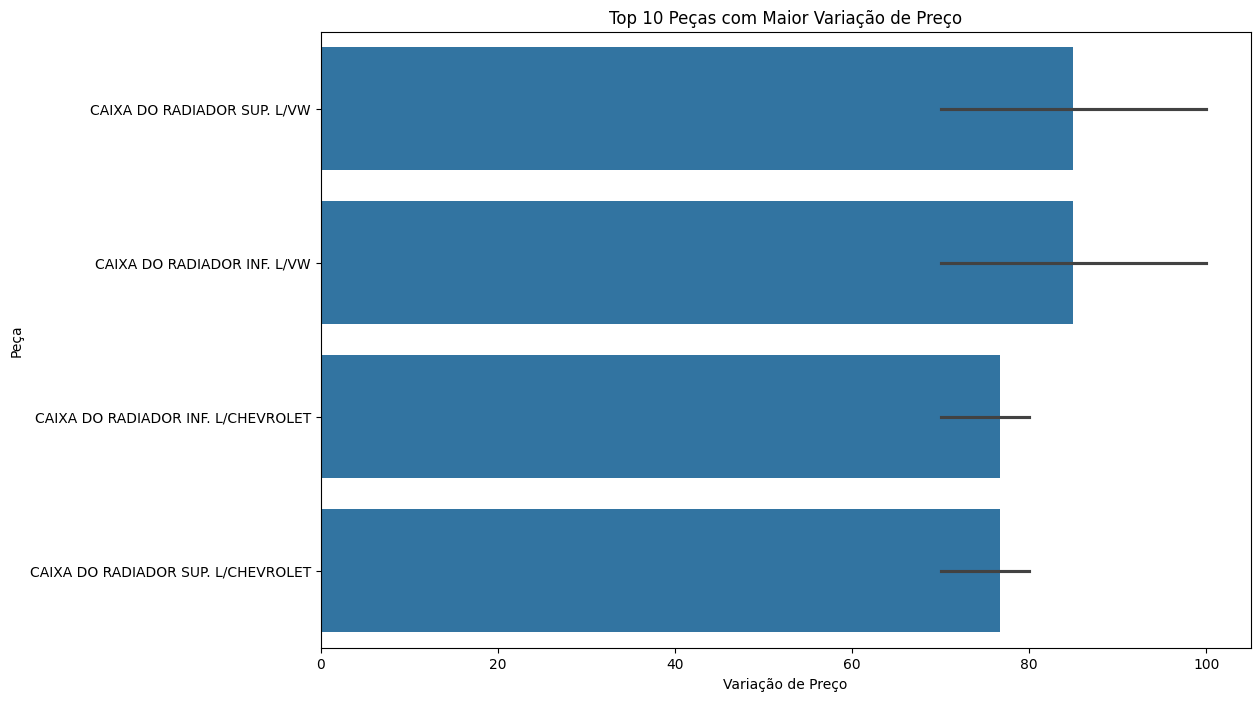

In [49]:
# Calcular variação de preços
df_estoque['Variação_Preço'] = df_estoque['Preço_Unitário_fin'] - df_estoque['Preço_Unitário_in']

# Variação de preços
plt.figure(figsize=(12, 8))
sns.barplot(x='Variação_Preço', y='Peças', data=df_estoque.sort_values(by='Variação_Preço', ascending=False).head(10))
plt.title('Top 10 Peças com Maior Variação de Preço')
plt.xlabel('Variação de Preço')
plt.ylabel('Peça')
plt.show()


# **3. PENDÊNCIAS**

# ***Total de Pendências***

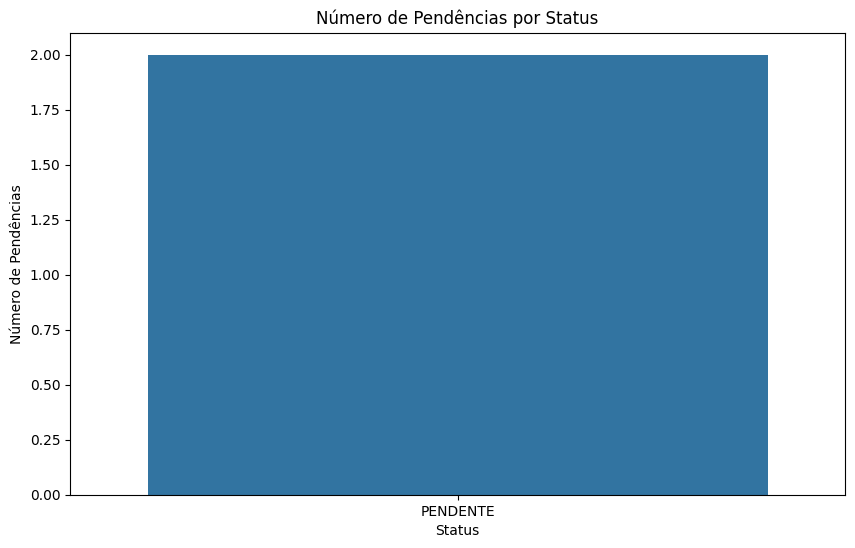

In [57]:
# Contar pendências por status
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=df_pendencias)
plt.title('Número de Pendências por Status')
plt.xlabel('Status')
plt.ylabel('Número de Pendências')
plt.show()


# ***Análise de Pendências por Tipo de Descrição***

In [74]:
# Total de pendências por descrição
pendencias_por_descricao = df_pendencias.groupby('Descrição')['Valor'].sum()

print("\nTotal de Pendências por Descrição:")
print(pendencias_por_descricao)



Total de Pendências por Descrição:
Descrição
FATURAS    1000
Name: Valor, dtype: int64


# ***Análise de Pendências por Data de Vencimento***

In [75]:
# Garantir que 'Data de Vencimento' está no formato correto
df_pendencias['Data de Vencimento'] = pd.to_datetime(df_pendencias['Data de Vencimento'])

# Analisar pendências por data de vencimento
pendencias_por_vencimento = df_pendencias.groupby(df_pendencias['Data de Vencimento'].dt.date)['Valor'].sum()

print("\nTotal de Pendências por Data de Vencimento:")
print(pendencias_por_vencimento)



Total de Pendências por Data de Vencimento:
Data de Vencimento
2024-07-09    500
2024-09-09    500
Name: Valor, dtype: int64


# ***Pendências por Valor***

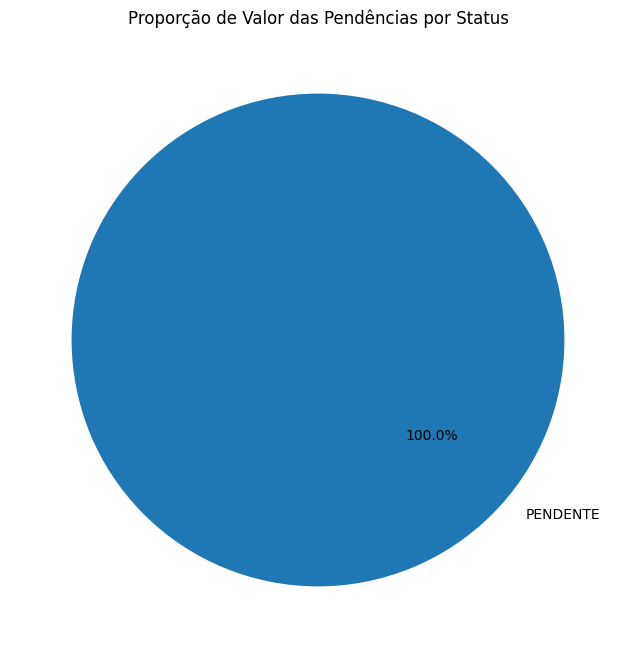

In [76]:
# Analisar valor das pendências
valor_pendencias = df_pendencias.groupby('Status')['Valor'].sum()

plt.figure(figsize=(8, 8))
labels = valor_pendencias.index
sizes = valor_pendencias
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporção de Valor das Pendências por Status')
plt.show()


# ***Pendências por Empresa***

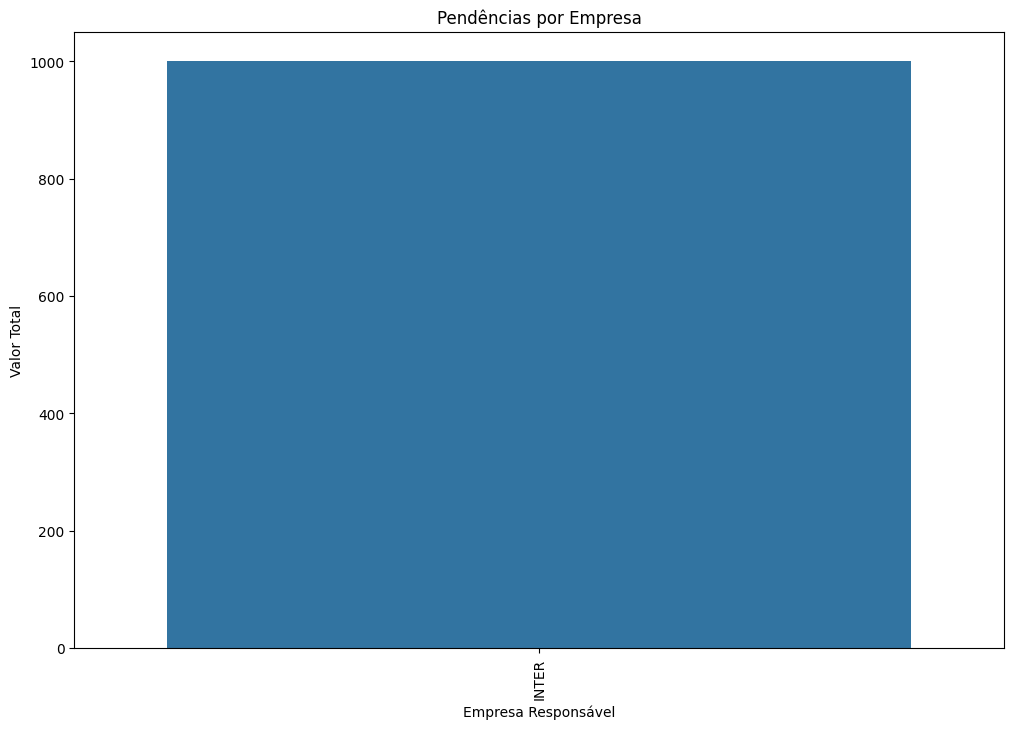

In [59]:
# Analisar pendências por empresa
pendencias_por_empresa = df_pendencias.groupby('Empresa Responsável')['Valor'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Empresa Responsável', y='Valor', data=pendencias_por_empresa)
plt.title('Pendências por Empresa')
plt.xlabel('Empresa Responsável')
plt.ylabel('Valor Total')
plt.xticks(rotation=90)
plt.show()


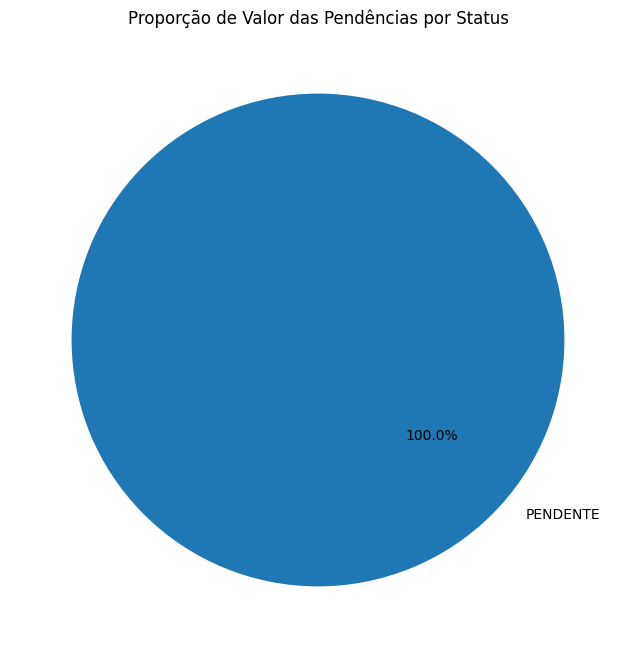

In [60]:
# Analisar valor das pendências
valor_pendencias = df_pendencias.groupby('Status')['Valor'].sum()

plt.figure(figsize=(8, 8))
labels = valor_pendencias.index
sizes = valor_pendencias
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporção de Valor das Pendências por Status')
plt.show()


# **4. FORNECEDORES**

# ***Análise de Contatos***

# ***Análise de Fornecedores por Endereço***

In [77]:
# Contagem de fornecedores por endereço
fornecedores_por_endereco = df_fornecedores['Endereço'].value_counts()

print("\nNúmero de Fornecedores por Endereço:")
print(fornecedores_por_endereco)



Número de Fornecedores por Endereço:
Endereço
BELÉM-PA    1
Name: count, dtype: int64


# ***Análise de Contatos por Tipo***

In [78]:
# Contagem de contatos por tipo
fornecedores_por_contato = df_fornecedores['Contato do Fornecedor'].value_counts()

print("\nNúmero de Fornecedores por Tipo de Contato:")
print(fornecedores_por_contato)



Número de Fornecedores por Tipo de Contato:
Contato do Fornecedor
(91) 98169-0351    1
Name: count, dtype: int64


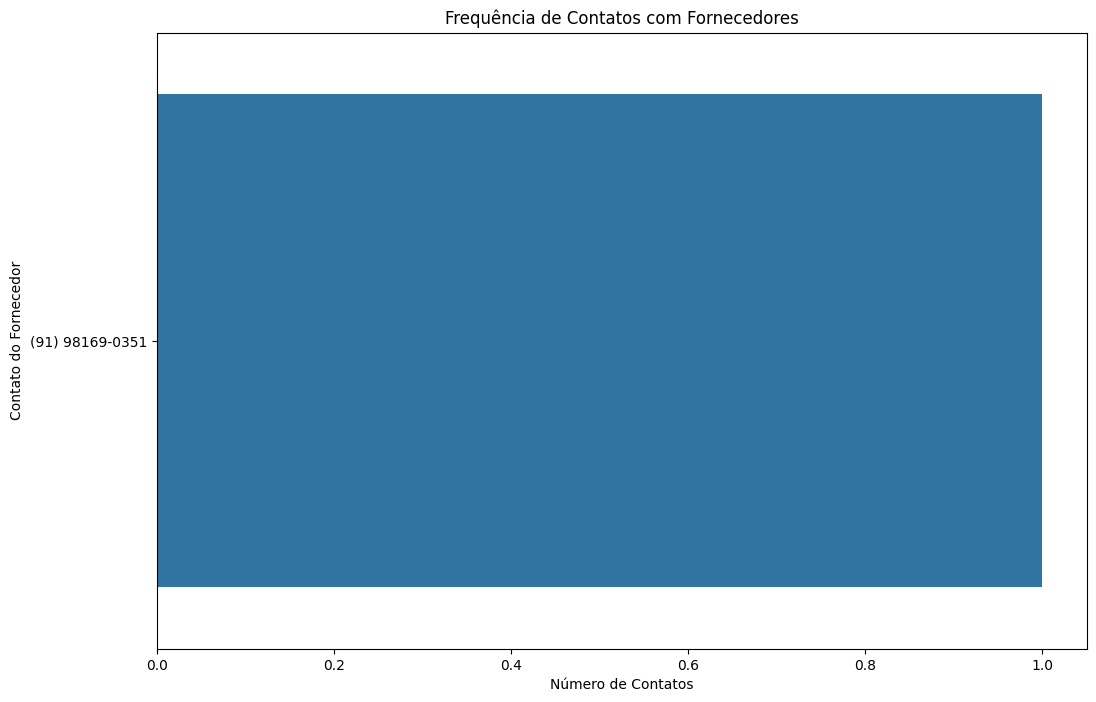

In [61]:
# Analisar contatos dos fornecedores
plt.figure(figsize=(12, 8))
sns.countplot(y='Contato do Fornecedor', data=df_fornecedores, order=df_fornecedores['Contato do Fornecedor'].value_counts().index)
plt.title('Frequência de Contatos com Fornecedores')
plt.xlabel('Número de Contatos')
plt.ylabel('Contato do Fornecedor')
plt.show()


# **5. DESPESAS**

# ***Total de Despesas***

# ***Análise de Despesas por Categoria***

In [121]:
# Total de despesas por categoria
despesas_por_categoria = df_despesas.groupby('Categoria')['Valor'].sum()

print("\nTotal de Despesas por Categoria:")
print(despesas_por_categoria)



Total de Despesas por Categoria:
Categoria
Alimentaçao    350
Name: Valor, dtype: int64


# ***Análise do Tempo de Despesas***

In [86]:
# Garantir que 'Data' está no formato correto
df_despesas['Data'] = pd.to_datetime(df_despesas['Data'])

# Analisar despesas por data
despesas_por_data = df_despesas.groupby(df_despesas['Data'].dt.date)['Valor'].sum()

print("\nTotal de Despesas por Data:")
print(despesas_por_data)



Total de Despesas por Data:
Data
2024-07-09    350
Name: Valor, dtype: int64


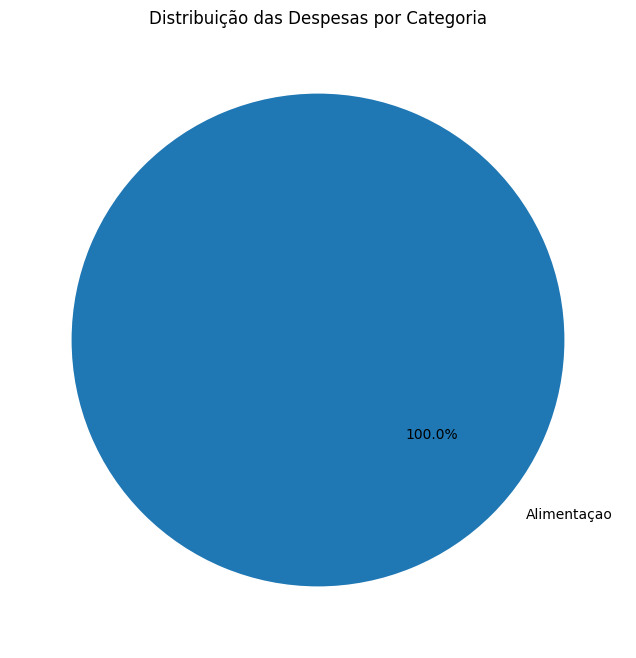

In [84]:
# Total de despesas
plt.figure(figsize=(8, 8))
labels = df_despesas['Categoria'].value_counts().index
sizes = df_despesas.groupby('Categoria')['Valor'].sum()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Despesas por Categoria')
plt.show()


# ***Despesas por Categoria***

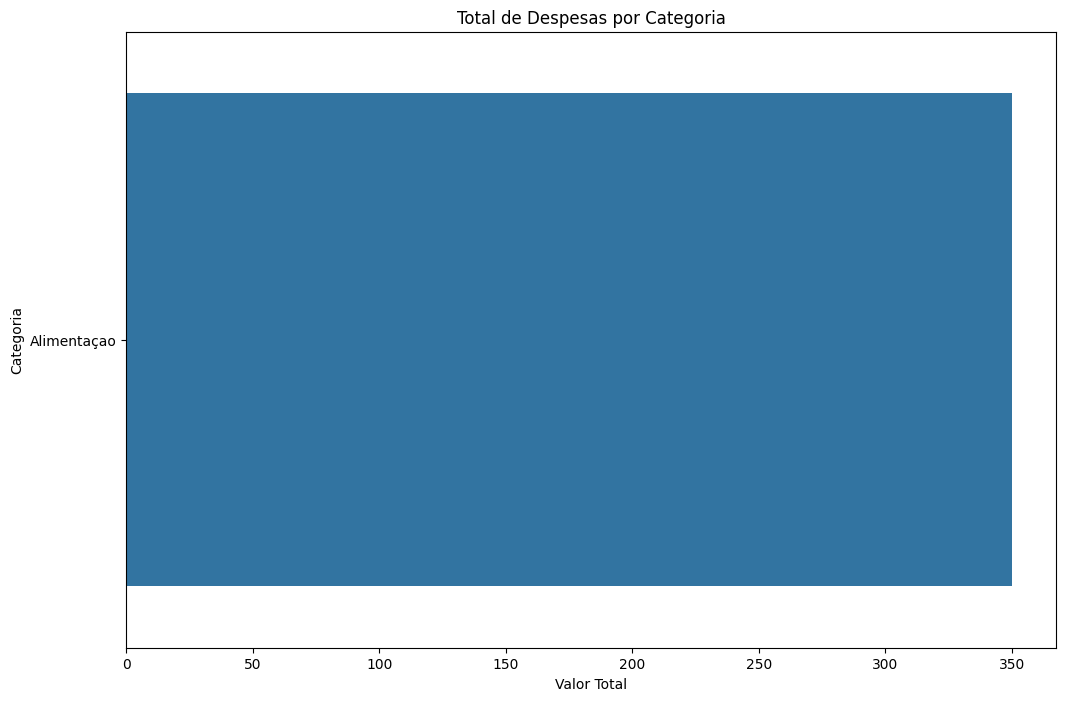

In [83]:
# Despesas por categoria
plt.figure(figsize=(12, 8))
sns.barplot(x='Valor', y='Categoria', data=df_despesas.groupby('Categoria')['Valor'].sum().reset_index())
plt.title('Total de Despesas por Categoria')
plt.xlabel('Valor Total')
plt.ylabel('Categoria')
plt.show()


# ***Análise de Valor e Data***

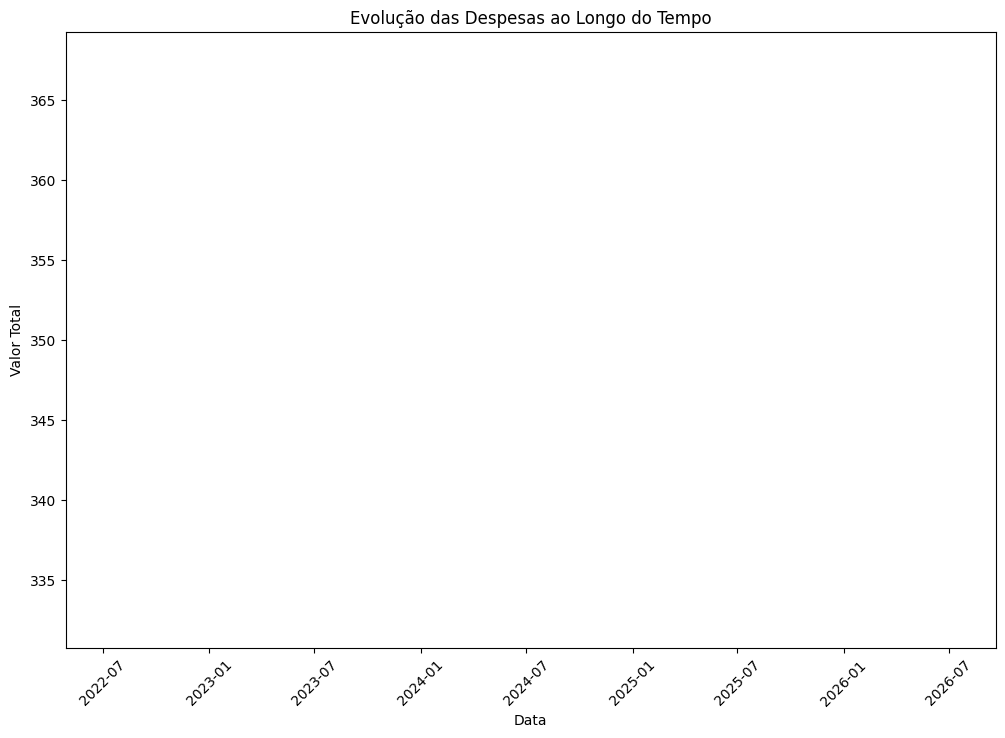

In [64]:
# Garantir que 'Data' é datetime
df_despesas['Data'] = pd.to_datetime(df_despesas['Data'])

# Analisar despesas ao longo do tempo
plt.figure(figsize=(12, 8))
sns.lineplot(x='Data', y='Valor', data=df_despesas.groupby('Data')['Valor'].sum().reset_index())
plt.title('Evolução das Despesas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor Total')
plt.xticks(rotation=45)
plt.show()


# **1. Algoritmos de Projeção**

# ***1.1. Previsão de Vendas Futuros (Serviços)***

# ***Código para Visualizar a Previsão com ARIMA***

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred fr


Previsão de Serviços para os Próximos 30 Dias com ARIMA:
2024-09-08   -0.652673
2024-09-09   -1.534087
2024-09-10   -2.004167
2024-09-11   -2.254874
2024-09-12   -2.388582
2024-09-13   -2.459892
2024-09-14   -2.497923
2024-09-15   -2.518206
2024-09-16   -2.529024
2024-09-17   -2.534793
2024-09-18   -2.537870
2024-09-19   -2.539511
2024-09-20   -2.540386
2024-09-21   -2.540853
2024-09-22   -2.541102
2024-09-23   -2.541235
2024-09-24   -2.541305
2024-09-25   -2.541343
2024-09-26   -2.541363
2024-09-27   -2.541374
2024-09-28   -2.541380
2024-09-29   -2.541383
2024-09-30   -2.541384
2024-10-01   -2.541385
2024-10-02   -2.541386
2024-10-03   -2.541386
2024-10-04   -2.541386
2024-10-05   -2.541386
2024-10-06   -2.541386
2024-10-07   -2.541386
Freq: D, Name: predicted_mean, dtype: float64


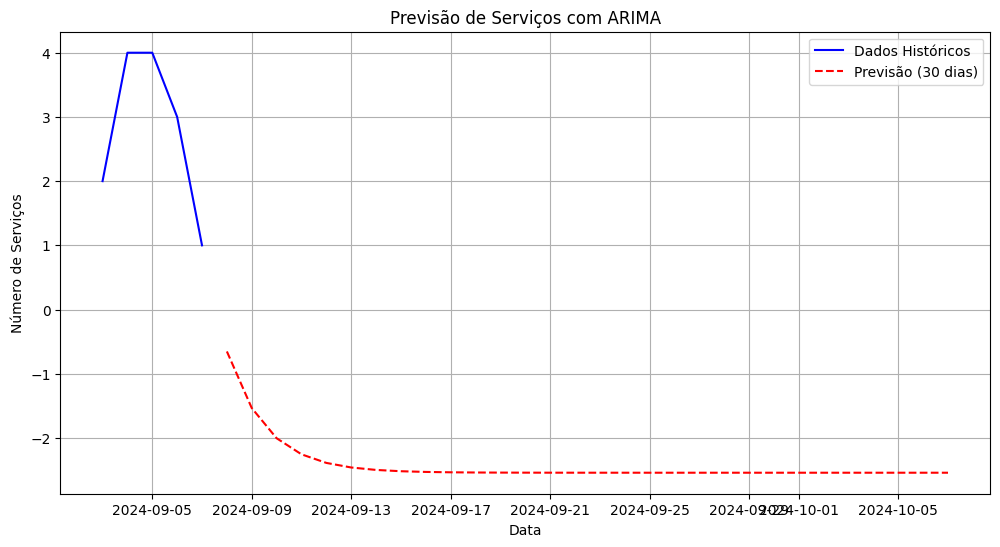

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Carregar os dados e preparar a série temporal
file_path = '/content/VINIX_FINANÇAS.xlsx'
df_servicos = pd.read_excel(file_path, sheet_name='Serviços')
df_servicos['Data_Serviço'] = pd.to_datetime(df_servicos['Data_Serviço'])
servicos_diarios = df_servicos.groupby(df_servicos['Data_Serviço'].dt.date)['ID'].count()

# Ajustar o modelo ARIMA
model = ARIMA(servicos_diarios, order=(1, 1, 1))  # Ajuste os parâmetros conforme necessário
fit_model = model.fit()

# Prever para os próximos 30 dias
forecast = fit_model.forecast(30)

from statsmodels.tsa.arima.model import ARIMA

# Preparar dados para a série temporal
df_servicos['Data_Serviço'] = pd.to_datetime(df_servicos['Data_Serviço'])
servicos_diarios = df_servicos.groupby(df_servicos['Data_Serviço'].dt.date)['ID'].count()

# Ajustar o modelo ARIMA
model = ARIMA(servicos_diarios, order=(1, 1, 1))  # Ajuste os parâmetros conforme necessário
fit_model = model.fit()

# Prever para os próximos 30 dias
forecast = fit_model.forecast(30)
print("\nPrevisão de Serviços para os Próximos 30 Dias com ARIMA:")
print(forecast)


# Preparar os dados para o gráfico
data_index = pd.date_range(start=servicos_diarios.index.min(), end=servicos_diarios.index.max())
forecast_index = pd.date_range(start=servicos_diarios.index.max() + pd.Timedelta(days=1), periods=30)

# Criar DataFrames para os dados históricos e a previsão
historical_data = pd.Series(servicos_diarios.values, index=data_index)
forecast_data = pd.Series(forecast, index=forecast_index)

# Plotar os dados históricos e a previsão
plt.figure(figsize=(12, 6))
plt.plot(historical_data, label='Dados Históricos', color='blue')
plt.plot(forecast_data, label='Previsão (30 dias)', color='red', linestyle='--')
plt.title('Previsão de Serviços com ARIMA')
plt.xlabel('Data')
plt.ylabel('Número de Serviços')
plt.legend()
plt.grid(True)
plt.show()


# ***1.2. Projeção de Lucro (Estoque)***

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


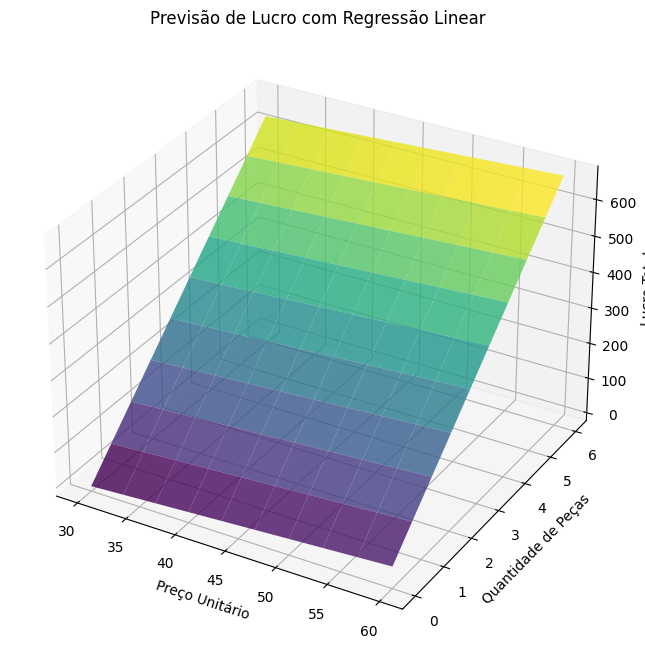

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Carregar os dados
file_path = '/content/VINIX_FINANÇAS.xlsx'
df_estoque = pd.read_excel(file_path, sheet_name='Estoque')

# Preparar dados para a regressão
X = df_estoque[['Preço_Unitário_in', 'Quantidade_Peças']]
y = df_estoque['Lucro_Total']

# Ajustar o modelo
model = LinearRegression()
model.fit(X, y)

# Criar uma grade de valores para o gráfico
import numpy as np

preco_unitario_range = np.linspace(df_estoque['Preço_Unitário_in'].min(), df_estoque['Preço_Unitário_in'].max(), 10)
quantidade_range = np.linspace(df_estoque['Quantidade_Peças'].min(), df_estoque['Quantidade_Peças'].max(), 10)
preco_unitario_grid, quantidade_grid = np.meshgrid(preco_unitario_range, quantidade_range)
X_grid = np.column_stack([preco_unitario_grid.ravel(), quantidade_grid.ravel()])

# Prever o lucro para a grade de valores
lucro_previsto = model.predict(X_grid).reshape(preco_unitario_grid.shape)

# Criar gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(preco_unitario_grid, quantidade_grid, lucro_previsto, cmap='viridis', alpha=0.8)
ax.set_xlabel('Preço Unitário')
ax.set_ylabel('Quantidade de Peças')
ax.set_zlabel('Lucro Total')
ax.set_title('Previsão de Lucro com Regressão Linear')

plt.show()


# ***1.3. Projeção de Despesas (Despesas)***


Previsão de Despesas para Novas Categorias:
[350.]


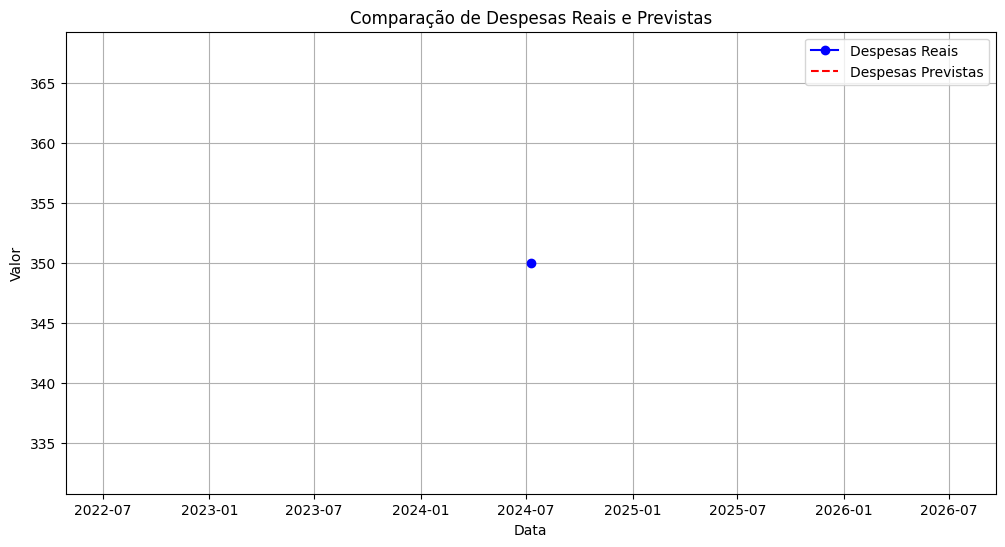

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Carregar os dados
file_path = '/content/VINIX_FINANÇAS.xlsx'
df_despesas = pd.read_excel(file_path, sheet_name='Despesas')

# Codificar variáveis categóricas
df_despesas_encoded = pd.get_dummies(df_despesas[['Categoria', 'Valor']], drop_first=True)

# Preparar dados para a regressão
X = df_despesas_encoded
y = df_despesas['Valor']

# Ajustar o modelo
model = LinearRegression()
model.fit(X, y)

# Preparar novas categorias para previsão
novas_categorias = pd.DataFrame({
    'Alimentação': [1],  # Exemplo com uma nova entrada
    'Saúde': [0]        # Adapte as categorias conforme o necessário
})

# Certifique-se de que as colunas estejam na mesma ordem
novas_categorias = novas_categorias.reindex(columns=X.columns, fill_value=0)

# Prever despesas
previsao_despesas = model.predict(novas_categorias)
print("\nPrevisão de Despesas para Novas Categorias:")
print(previsao_despesas)
# Adicionar a previsão ao DataFrame original para comparação
df_despesas['Previsao'] = model.predict(X)

# Plotar despesas reais vs. previstas
plt.figure(figsize=(12, 6))

# Gráfico de despesas reais
plt.plot(df_despesas['Data'], df_despesas['Valor'], label='Despesas Reais', color='blue', marker='o')

# Gráfico de despesas previstas
plt.plot(df_despesas['Data'], df_despesas['Previsao'], label='Despesas Previstas', color='red', linestyle='--')

# Adicionar legendas e títulos
plt.title('Comparação de Despesas Reais e Previstas')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()
